In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
%config Application.log_level="INFO"

In [3]:
%env TP_ISAE_DATA = /home/fchouteau/repositories/tp_isae/data/

env: TP_ISAE_DATA=/home/fchouteau/repositories/tp_isae/data/


In [4]:
# Load data
import json
import os
from khumeia.data.collection import SatelliteImagesCollection

RAW_DATA_DIR = os.path.join(os.environ.get("TP_ISAE_DATA"), "raw")
TRAINVAL_DATA_DIR = os.path.join(RAW_DATA_DIR, "trainval")

trainval_collection = SatelliteImagesCollection.from_path(TRAINVAL_DATA_DIR)

# We reduce the collection to 2 items for this demo in order to run cells faster
trainval_collection.items = trainval_collection.items[:2]

print(trainval_collection)

--- Item collection ---
collection_id: trainval
Number of items: 2
--- Item description ---
image_id: USGS_ATL
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_ATL.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_ATL.json
image_shape: (7852, 6689, 3)
number of labels: 35
--- Item description ---
image_id: USGS_AUS
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_AUS.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_AUS.json
image_shape: (7628, 6722, 3)
number of labels: 63



In [5]:
# Import vis
%matplotlib notebook

from khumeia.utils import list_utils
from khumeia import visualisation
from matplotlib import pyplot as plt

# Sliding windows and samplers showcase

In [6]:
from khumeia.data.dataset import TilesDataset
dataset = TilesDataset(items=trainval_collection)

/home/fchouteau/miniconda3/envs/tp_isae/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Multiple examples of sliding windows

### Sliding with only one stride

In [7]:
from khumeia.data.dataset import SlidingWindow

In [8]:
sliding_window = SlidingWindow(
    tile_size=64,
    stride=64,
    discard_background=False,
    padding=0,
    label_assignment_mode="center")

dataset.generate_candidates_tiles(sliding_windows=sliding_window)

print(dataset)

[2018-11-08 23:08:57,582][tp-isae][dataset][INFO] Generating a pool of candidates tiles



[2018-11-08 23:08:59,162][tp-isae][dataset][INFO] Candidates tiles generated ! Now sample them using Dataset.sample_tiles_from_candidates
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}

- Samplers:

- Candidate tiles:
Item USGS_ATL: 12688 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 30 rois
Item USGS_AUS: 12495 rois
Item USGS_AUS: Label background: 12457 rois
Item USGS_AUS: Label aircraft: 38 rois

- Sampled tiles:
Item USGS_ATL: 12688 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 30 rois
Item USGS_AUS: 12495 rois
Item USGS_AUS: Label background: 12457 rois
Item USGS_AUS: Label aircraft: 38 rois



<IPython.core.display.Javascript object>


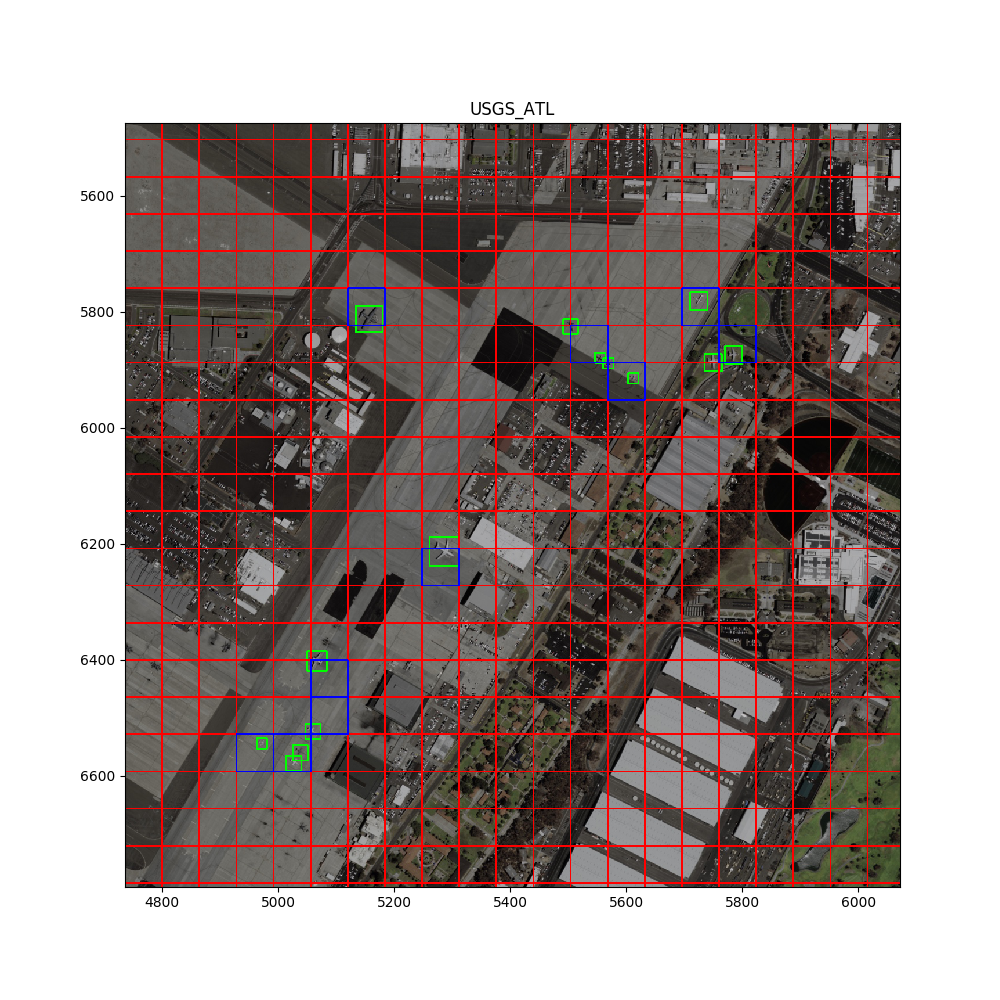

In [10]:
# A demo with higher level functions in the framework
item = dataset.items[0]
tiles = dataset.candidate_tiles

image = visualisation.draw_item_with_tiles(item, tiles)
plt.figure(figsize=(10, 10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()

In [12]:
# Change labelling mode from "center" to intersection.area / min(area1, area2)
sliding_window = SlidingWindow(
    tile_size=64,
    stride=64,
    discard_background=False,
    padding=0,
    label_assignment_mode="ioa",
    intersection_over_area_threshold=0.30)

dataset.generate_candidates_tiles(sliding_windows=sliding_window)

print(dataset)

[2018-11-08 23:12:17,990][tp-isae][dataset][INFO] Generating a pool of candidates tiles



[2018-11-08 23:12:22,525][tp-isae][dataset][INFO] Candidates tiles generated ! Now sample them using Dataset.sample_tiles_from_candidates
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "ioa",
    "ioa_threshold": 0.3,
    "discard_background": false,
    "data_transform_fn": null
}

- Samplers:

- Candidate tiles:
Item USGS_ATL: 12688 rois
Item USGS_ATL: Label background: 12649 rois
Item USGS_ATL: Label aircraft: 39 rois
Item USGS_AUS: 12495 rois
Item USGS_AUS: Label background: 12450 rois
Item USGS_AUS: Label aircraft: 45 rois

- Sampled tiles:
Item USGS_ATL: 12688 rois
Item USGS_ATL: Label background: 12649 rois
Item USGS_ATL: Label aircraft: 39 rois
Item USGS_AUS: 12495 rois
Item USGS_AUS: Label background: 12450 rois
Item USGS_AUS: Label aircraft: 45 rois



<IPython.core.display.Javascript object>


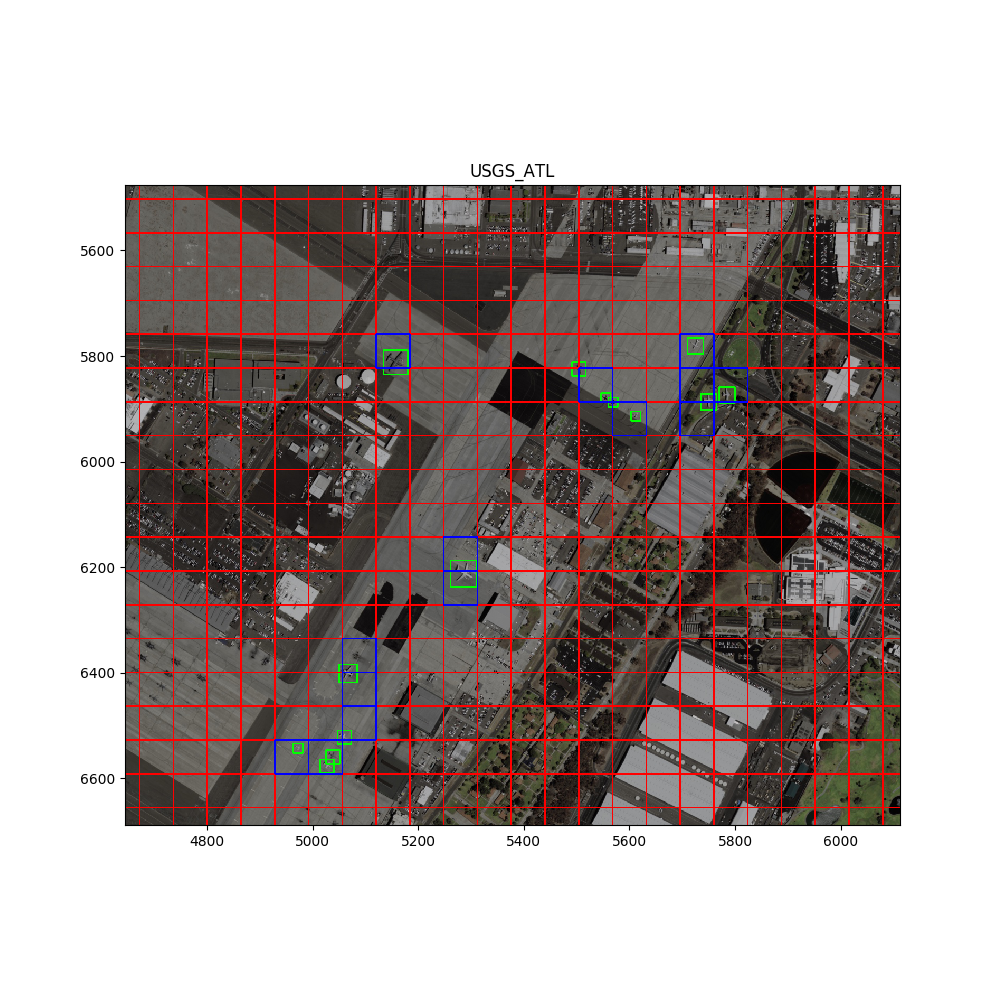

In [13]:
# A demo with higher level functions in the framework
item = dataset.items[0]
tiles = dataset.candidate_tiles

image = visualisation.draw_item_with_tiles(item, tiles)
plt.figure(figsize=(10, 10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()

### Sliding windows with multiple strides

In [14]:
sliding_window = SlidingWindow(
    tile_size=64,
    stride=64,
    discard_background=False,
    padding=0,
    label_assignment_mode="center")

sliding_window_fine = SlidingWindow(
    tile_size=64,
    stride=16,
    discard_background=True,
    padding=0,
    label_assignment_mode="center")

dataset.generate_candidates_tiles(
    sliding_windows=[sliding_window, sliding_window_fine])

print(dataset)

[2018-11-08 23:16:43,979][tp-isae][dataset][INFO] Generating a pool of candidates tiles



[2018-11-08 23:17:06,617][tp-isae][dataset][INFO] Candidates tiles generated ! Now sample them using Dataset.sample_tiles_from_candidates
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
Item USGS_AUS: Label background: 12457 rois
Item USGS_AUS: Label aircraft: 583 rois

- Sampled tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Ite

<IPython.core.display.Javascript object>


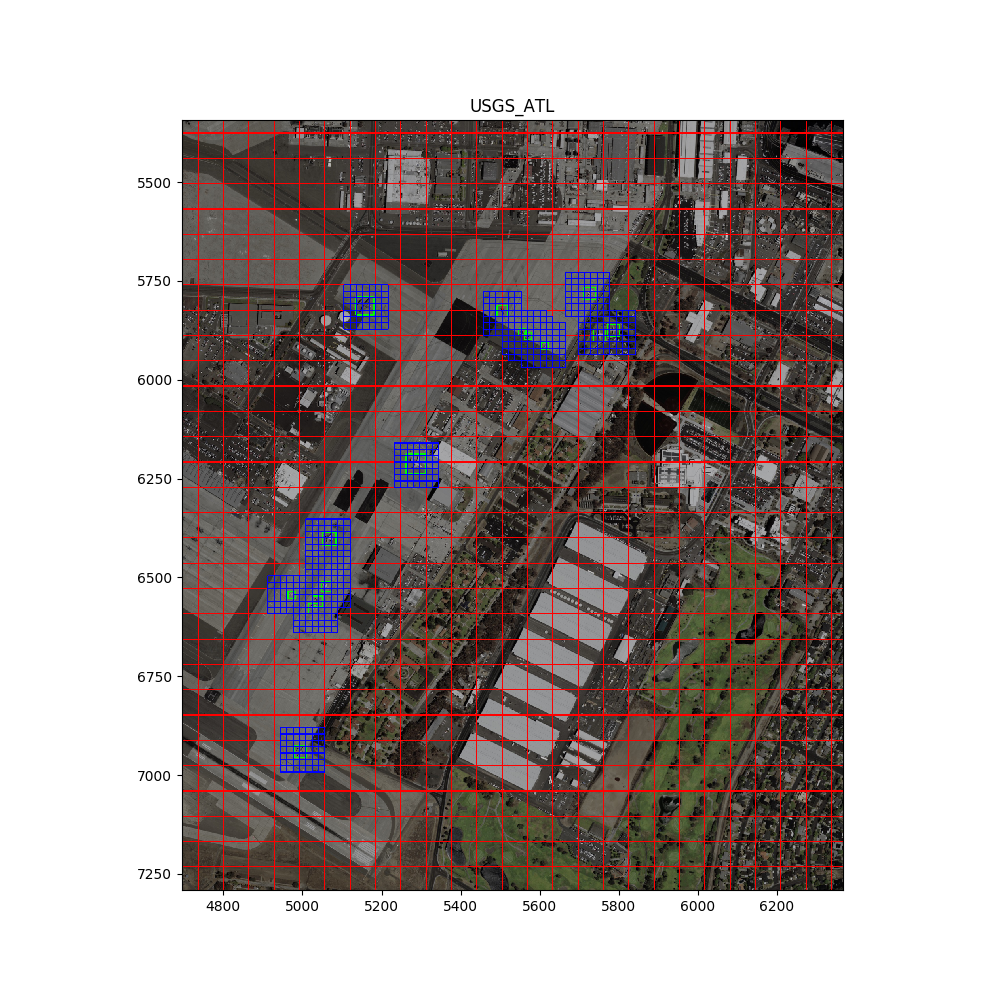

In [15]:
# A demo with higher level functions in the framework
item = dataset.items[0]
tiles = dataset.candidate_tiles

image = visualisation.draw_item_with_tiles(item, tiles)
plt.figure(figsize=(10, 10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()

## Samplers

In [16]:
from khumeia.data.sampler import *

In [17]:
# Random sampling
sampler = RandomSampler(nb_tiles_max=4000, with_replacement=False)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:17:56,793][tp-isae][dataset][INFO] Sampling tiles


[2018-11-08 23:17:56,813][tp-isae][sampler][INFO] Sampling

[2018-11-08 23:17:56,847][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "RandomSampler",
    "with_replacement": false,
    "shuffle": true,
    "nb_tiles_max": 4000,
    "target_label": null
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 1

In [18]:
sampler = RandomPerItemSampler(nb_tiles_max=4000, with_replacement=False)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:17:57,109][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:57,191][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "RandomPerItemSampler",
    "with_replacement": false,
    "shuffle": true,
    "nb_tiles_max": 4000,
    "target_label": null
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
Item USGS_AUS: Label background: 12457 roi

In [19]:
# Manually sample n aircrafts and m background
sampler1 = RandomPerItemSampler(
    nb_tiles_max=1000, with_replacement=False, target_label="aircraft")
sampler2 = RandomPerItemSampler(
    nb_tiles_max=2000, with_replacement=False, target_label="background")
dataset.sample_tiles_from_candidates(tiles_samplers=[sampler1, sampler2])
print(dataset)

[2018-11-08 23:17:58,034][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:58,154][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "RandomPerItemSampler",
    "with_replacement": false,
    "shuffle": true,
    "nb_tiles_max": 1000,
    "target_label": "aircraft"
}
{
    "class": "RandomPerItemSampler",
    "with_replacement": false,
    "shuffle": true,
    "nb_tiles_max": 2000,
    "target_label": "background"
}

- Candidate tiles:
Item USGS_ATL: 13130

In [20]:
# Manually sample n aircrafts and m background with replacement
sampler1 = RandomPerItemSampler(
    nb_tiles_max=1000, with_replacement=True, target_label="aircraft")
sampler2 = RandomPerItemSampler(
    nb_tiles_max=2000, with_replacement=False, target_label="background")
dataset.sample_tiles_from_candidates(tiles_samplers=[sampler1, sampler2])
print(dataset)

[2018-11-08 23:17:58,256][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:58,391][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "RandomPerItemSampler",
    "with_replacement": true,
    "shuffle": true,
    "nb_tiles_max": 1000,
    "target_label": "aircraft"
}
{
    "class": "RandomPerItemSampler",
    "with_replacement": false,
    "shuffle": true,
    "nb_tiles_max": 2000,
    "target_label": "background"
}

- Candidate tiles:
Item USGS_ATL: 13130 

In [21]:
# Advanced sampler: Stratification
sampler = StratifiedPerItemSampler(nb_tiles_max=4000, with_replacement=True)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:17:58,515][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:58,657][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "StratifiedPerItemSampler",
    "with_replacement": true,
    "shuffle": true,
    "nb_tiles_max": 4000
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
Item USGS_AUS: Label background: 12457 rois
Item USGS_AUS: Label 

In [22]:
# Advanced sampler: Background to foreground ratio
sampler = BackgroundToPositiveRatioPerItemSampler(
    background_to_positive_ratio=2,
    nb_positive_tiles_max=1000,
    with_replacement=True)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:17:58,799][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:58,927][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "BackgroundToPositiveRatioPerItemSampler",
    "with_replacement": true,
    "shuffle": true,
    "background_to_positive_ratio": 2,
    "nb_positive_tiles_max": 1000
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
It

In [23]:
# Advanced sampler: Background to foreground ratio without replacement
sampler = BackgroundToPositiveRatioPerItemSampler(
    background_to_positive_ratio=2,
    nb_positive_tiles_max=None,
    with_replacement=False)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:17:59,047][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:17:59,173][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "BackgroundToPositiveRatioPerItemSampler",
    "with_replacement": false,
    "shuffle": true,
    "background_to_positive_ratio": 2,
    "nb_positive_tiles_max": null
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
I

In [24]:
# Advanced sampler: Background to foreground ratio
sampler = BackgroundToPositiveRatioPerItemSampler(
    background_to_positive_ratio=2,
    nb_positive_tiles_max=1000,
    with_replacement=True)
dataset.sample_tiles_from_candidates(tiles_samplers=sampler)
print(dataset)

[2018-11-08 23:18:00,383][tp-isae][dataset][INFO] Sampling tiles



[2018-11-08 23:18:00,491][tp-isae][dataset][INFO] Tiles sampled, now generate the dataset using Dataset.generate_tiles_dataset
--- TilesDataset ---
Found labels ['background', 'aircraft']
- Sliding windows:
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 64,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": false,
    "data_transform_fn": null
}
{
    "class": "SlidingWindow",
    "tile_size": 64,
    "stride": 16,
    "padding": 0,
    "label_assignment_mode": "center",
    "ioa_threshold": 0.5,
    "discard_background": true,
    "data_transform_fn": null
}

- Samplers:
{
    "class": "BackgroundToPositiveRatioPerItemSampler",
    "with_replacement": true,
    "shuffle": true,
    "background_to_positive_ratio": 2,
    "nb_positive_tiles_max": 1000
}

- Candidate tiles:
Item USGS_ATL: 13130 rois
Item USGS_ATL: Label background: 12658 rois
Item USGS_ATL: Label aircraft: 472 rois
Item USGS_AUS: 13040 rois
It

<IPython.core.display.Javascript object>


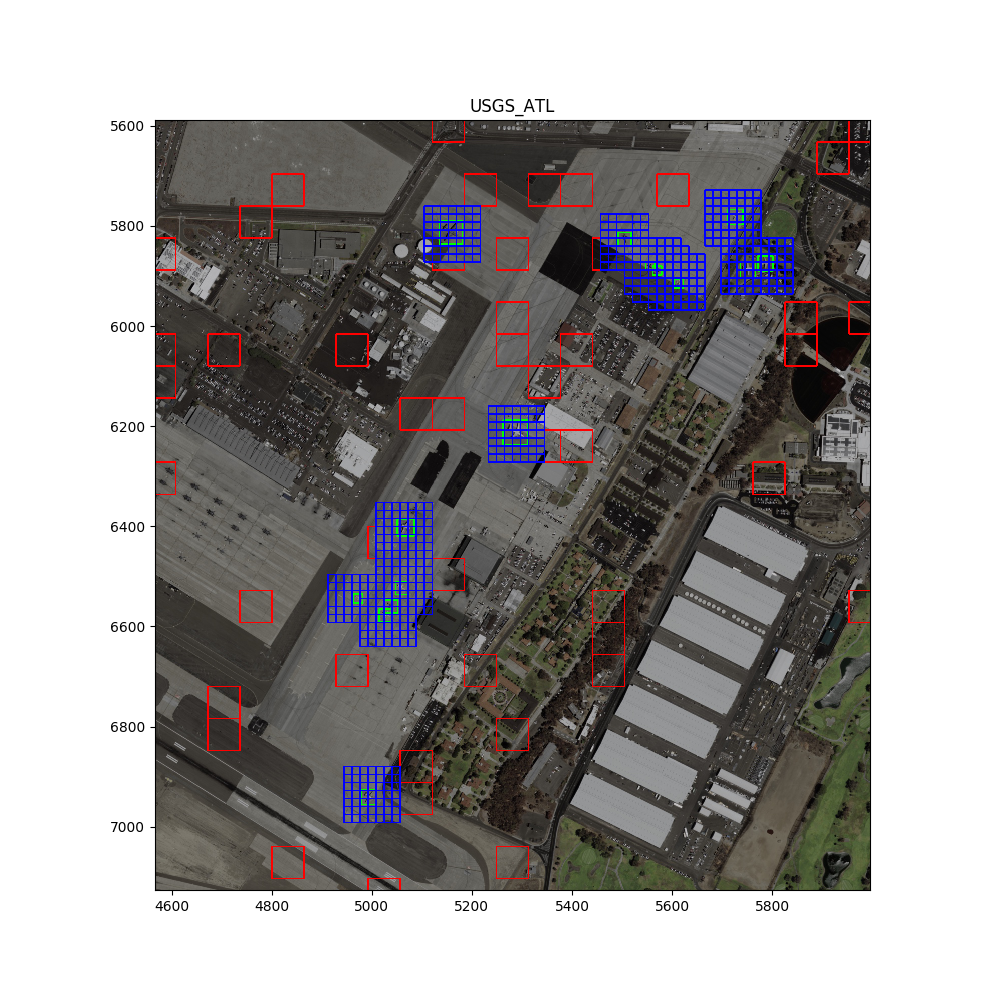

In [25]:
# A demo with higher level functions in the framework
item = dataset.items[0]
tiles = dataset.sampled_tiles

image = visualisation.draw_item_with_tiles(item, tiles)
plt.figure(figsize=(10, 10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()